# Heart Failure Prediction Dataset

https://www.kaggle.com/fedesoriano/heart-failure-prediction

## Data Decription

**Context** <br>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**

1. Age: age of the patient (years) <br>
2. Sex: sex of the patient <br>
&nbsp; &nbsp; M: Male <br>
&nbsp; &nbsp; F: Female <br>
3. ChestPainType: chest pain type <br>
&nbsp; &nbsp; TA: Typical Angina <br>
&nbsp; &nbsp; ATA: Atypical Angina <br>
&nbsp; &nbsp; NAP: Non-Anginal Pain <br>
&nbsp; &nbsp; ASY: Asymptomatic <br>
4. RestingBP: resting blood pressure (mm Hg) <br>
5. Cholesterol: serum cholesterol (mg/dl) <br>
6. FastingBS: fasting blood sugar <br>
&nbsp; &nbsp; 1: if FastingBS > 120 mg/dl <br>
&nbsp; &nbsp; 0: otherwise <br>
7. RestingECG: resting electrocardiogram results <br>
&nbsp; &nbsp; Normal: Normal <br>
&nbsp; &nbsp; ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
&nbsp; &nbsp; LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] <br>
8. MaxHR: maximum heart rate achieved (Numeric value between 60 and 202) <br>
9. ExerciseAngina: exercise-induced angina <br>
&nbsp; &nbsp; Y: Yes <br>
&nbsp; &nbsp; N: No <br>
10. Oldpeak: oldpeak = ST (Numeric value measured in depression) <br>
11. ST_Slope: the slope of the peak exercise ST segment <br>
&nbsp; &nbsp; Up: upsloping <br>
&nbsp; &nbsp; Flat: flat <br>
&nbsp; &nbsp; Down: downsloping] <br>
12. HeartDisease: output class <br>
&nbsp; &nbsp; 1: Heart disease <br>
&nbsp; &nbsp; 0: Normal <br>

**Source**

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations <br>
Hungarian: 294 observations <br>
Switzerland: 123 observations <br>
Long Beach VA: 200 observations <br>
Stalog (Heart) Data Set: 270 observations <br>

Total: 1190 observations <br>
Duplicated: 272 observations <br>

Final dataset: 918 observations <br>

## Loading Data, Libraries

### Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
import math

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score 
from sklearn.metrics import classification_report, average_precision_score
from sklearn.metrics import roc_curve, auc

import time

from IPython.display import Image

### Color Palette

In [3]:
palette = ['#457DAF', '#BF2D2D', '#00A690', '#FFF373', '#FFC387', '#986960', 
           '#97A5CD', '#586BA4', '#595358', '#E41B79', '#587B7F']
palette_light = ['#5691C4', '#BF2D2D', '#00A690', '#FFF373', '#FFC387','#986960', 
                 '#97A5CD', '#586BA4', '#595358', '#E41B79', '#587B7F']
palette_r = palette[::-1]
palette_heatmap = ['#1E71B9', '#4B8DC7', '#78AAD5', '#A5C6E3', '#D2E3F1', '#FFFFFF', 
                   '#EBCCCC', '#D79999', '#C46666', '#B03333', '#9C0000']
palette_gradient_narrow = ['#3982C1', '#88B4DA', '#BDD5EA', '#F2F6FA']
palette_gradient = ['#1E71B9', '#357FC0', '#4B8DC7', '#629CCE', '#78AAD5', '#8FB8DC', 
                    '#A5C6E3', '#BCD4EA', '#D2E3F1', '#E9F1F8', '#FFFFFF']
palette_gradient_wide = ['#00539C', '#0D5CA1', '#1964A6', '#266DAB', '#3375B0', '#407EB5', '#4C86BA', '#598FBF', 
                         '#6698C4', '#73A0C9', '#7FA9CD', '#8CB1D2', '#99BAD7', '#A6C3DC', '#B2CBE1', '#BFD4E6', 
                         '#CCDCEB', '#D9E5F0', '#E5EDF5', '#F2F6FA']
palette_pairplot = ['#8DB4D7', '#BF2D2D', '#00A690', '#FFF373', '#FFC387', '#986960',
                    '#97A5CD', '#586BA4', '#595358', '#E41B79', '#587B7F']
color = '#6E9CC5'

custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', palette=palette, rc=custom_params)

pd.set_option('display.max_rows', 100)

### Data

In [4]:
data_raw = pd.read_csv('heart.csv')

## Data Overview

#### Functions

In [5]:
def create_var_lists (df):  
    
    global var_list
    var_list = df.columns
    global tar_list
    tar_list = []
    global feat_list
    feat_list = df.columns[:-1]
    global con_feat_list
    con_feat_list = []
    global cat_feat_list
    cat_feat_list = []
    global nom_feat_list
    nom_feat_list = []
    global bin_feat_list
    bin_feat_list = []

    col = df.columns.to_list()
    col_var = df.describe().columns.to_list()
    
    for i in col[:-1]:
        if col_var.count(i) == 1:
            if df[i].value_counts().count() == 2:
                bin_feat_list.append(i)
                cat_feat_list.append(i)
            else:
                con_feat_list.append(i)
        if col_var.count(i) == 0:
            if df[i].value_counts().count() == 2:
                bin_feat_list.append(i)
                cat_feat_list.append(i)
            else:
                nom_feat_list.append(i)
                cat_feat_list.append(i)
    tar_list = col[-1:]
    feat_list = con_feat_list + cat_feat_list


def info (df):

    print('')
    display(df.head())
    print('Shape:', df.shape, '\n')
    print('Continuous Variables ({}):'.format((len(con_feat_list))))
    print(con_feat_list, '\n')
    print('Nominal Variables ({}):'.format(len(nom_feat_list)))
    print(cat_feat_list, '\n')
    print('Binary Variables ({}):'.format(len(bin_feat_list)))
    print(bin_feat_list, '\n')
    print('Target Variable ({}):'.format(len(tar_list)))
    print(tar_list, '\n')
    print('Categorial Variables values ({}):'.format(len(cat_feat_list)))
    
    for i in cat_feat_list:
        print('{}'.format(i), pd.unique(df[i]))

    print('')

    print(pd.concat([df.dtypes.rename('Type').to_frame(), 
                     df.isnull().sum().rename('NaN').to_frame()], 
                    axis=1), '\n')

### Information

In [6]:
data_raw.columns = map(str.lower, data_raw.columns)
data_raw = data_raw.rename(columns={'heartdisease': 'hd'})

create_var_lists(data_raw)
info(data_raw)
data_raw.describe().T

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Shape: (918, 12) 

Continuous Variables (5):
['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak'] 

Nominal Variables (3):
['sex', 'chestpaintype', 'fastingbs', 'restingecg', 'exerciseangina', 'st_slope'] 

Binary Variables (3):
['sex', 'fastingbs', 'exerciseangina'] 

Target Variable (1):
['hd'] 

Categorial Variables values (6):
sex ['M' 'F']
chestpaintype ['ATA' 'NAP' 'ASY' 'TA']
fastingbs [0 1]
restingecg ['Normal' 'ST' 'LVH']
exerciseangina ['N' 'Y']
st_slope ['Up' 'Flat' 'Down']

                   Type  NaN
age               int64    0
sex              object    0
chestpaintype    object    0
restingbp         int64    0
cholesterol       int64    0
fastingbs         int64    0
restingecg       object    0
maxhr             int64    0
exerciseangina   object    0
oldpeak         float64    0
st_slope         object    0
hd                int64    0 



,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
restingbp,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fastingbs,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
maxhr,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
hd,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### Histograms

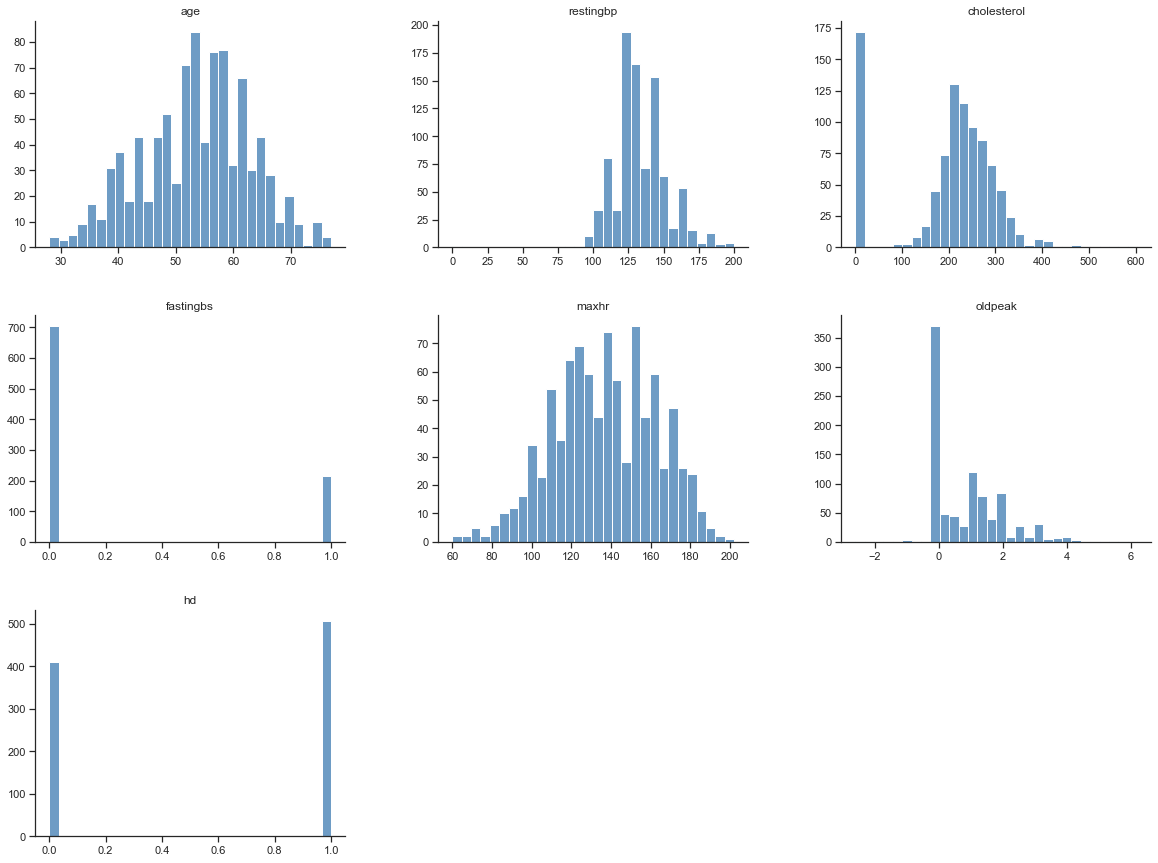

In [7]:
data_raw.hist(figsize=(20,15), bins=30, grid=False, color=color);

### Balance

Target Variable is balanced

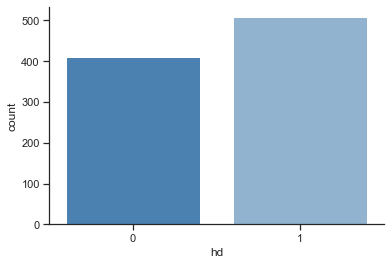

Heart Disease (positive): 508
Heart Disease (negative): 410 



In [8]:
sns.countplot(data=data_raw, x='hd', palette=palette_gradient_narrow)
plt.show()
print(f"Heart Disease (positive): {data_raw.loc[data_raw.hd == 1]['hd'].count()}")
print(f"Heart Disease (negative): {data_raw.loc[data_raw.hd == 0]['hd'].count()}", '\n')

## Data Visualizing and Discover

#### Functions

In [9]:
def cat_feat_plot(df, cat_feat_list, columns=3, figsize=(14,9)):
    
    f, axes = plt.subplots(round(len(cat_feat_list)/columns), columns, figsize=figsize)
    
    j=0
    k=0

    for i in cat_feat_list:
        sns.countplot(data=df, 
                      x=i, 
                      hue='hd', 
                      ax=axes[j , k], 
                      palette=palette_light);
        k+=1
        if k==columns:
            j+=1
            k=0

            
def corr_matrix_plot(df, con_feat_list, figsize=(6,6)):
    
    plt.subplots(figsize=figsize)

    # generate mask for upper triangle
    mask = np.zeros_like(df[con_feat_list].corr(), dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # generate heatmap masking the upper triangle and shrink the cbar
    sns.heatmap(df[con_feat_list].corr(), mask=mask, center=0, square=True, annot=True, 
                cmap=palette_heatmap, annot_kws={'size': 13}, cbar_kws={'shrink': 0.7})
    plt.xticks(size=13)
    plt.yticks(size=13)
    plt.xticks(rotation=50)
    plt.yticks(rotation=50)

    plt.show()

    
def vif(exogs, data):

    vif_dict, tolerance_dict = {}, {}

    # разбиваем данные на экзогенные и эндогенные переменные
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        r_squared = LinearRegression().fit(X, y).score(X, y)

        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    # df_vif = df_vif.sort_values('VIF', ascending=0).reset_index().rename(columns={'index': 'Feature Name'})
    df_vif = df_vif.sort_values('VIF', ascending=0)
    
    return df_vif

### Continuous Variables Exploration

In [10]:
con_feat_list

['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']

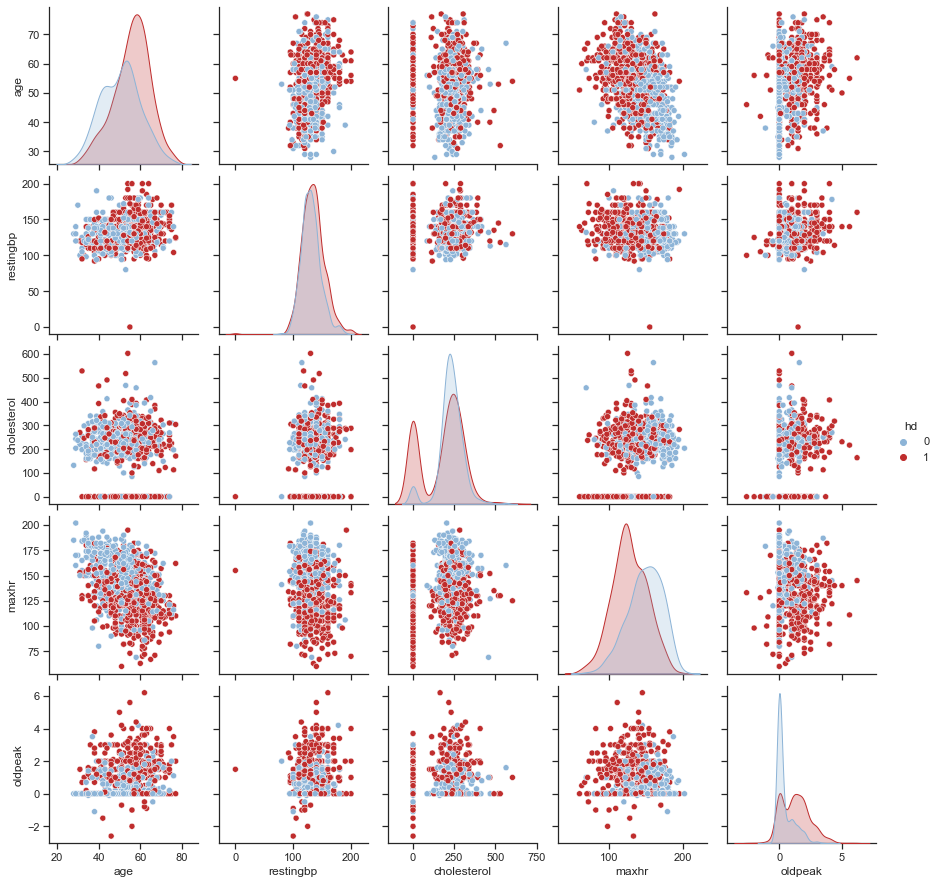

In [11]:
sns.pairplot(data_raw[con_feat_list + tar_list], hue='hd',
             height=2.5, palette=sns.color_palette(palette_pairplot,2));

#### Conclusions

**age** - looks like the patients with higher age more often have heart disease <br>
**cholesterol** - a lot of zero values <br>
**maxhr** - looks like the patients with lower more often have heart disease <br>

**maxhr, age** - little correlation <br>

### Discrete variables exploration

In [12]:
cat_feat_list

['sex',
 'chestpaintype',
 'fastingbs',
 'restingecg',
 'exerciseangina',
 'st_slope']

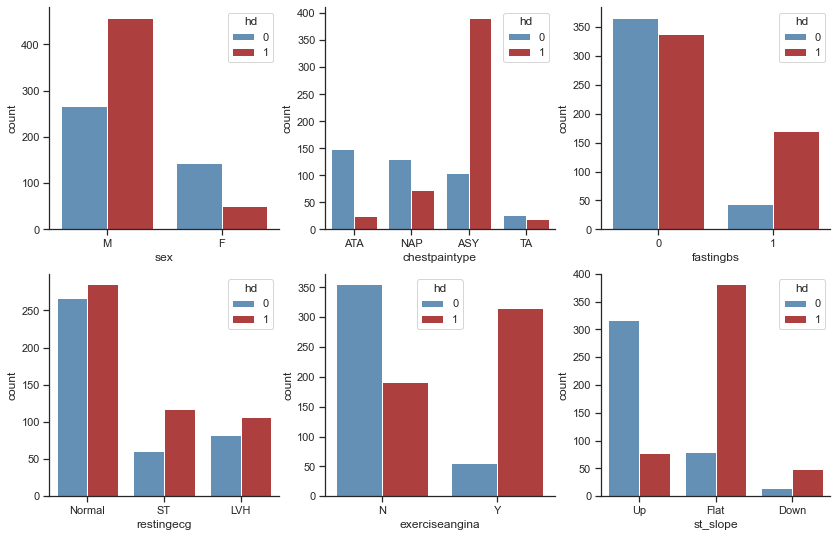

In [13]:
cat_feat_plot(data_raw, cat_feat_list)

#### Conclusions

- **sex** <br>
Looks like 'men=True' gives much more chanses to positive heart disease. <br>
- **fastingbs** <br>
Looks like 'fastingbs=1' gives more chanses to positive heart disease. <br>
- **exerciseangina** <br>
Looks like 'exerciseangina=1' gives more chanses to positive heart disease. <br>
- **restingecg** <br>
Looks like the most useless feature <br>
- **st_slope** <br>
Looks like the most important feature <br>
'st_slope=Flat' gives much more chanses to positive heart disease. <br>
'st_slope=Up' gives much more chanses to negative heart disease. <br>
- **chestpaintype** <br>
Looks like 'chestpaintype=ASY' gives more chanses to positive heart disease. <br>
Looks like 'chestpaintype=ASY' gives more chanses to negative heart disease. <br>

### Skewness

In [14]:
data_skew = pd.DataFrame(data_raw[con_feat_list].skew(numeric_only=True), index=None, columns=['Skewness'])

In [15]:
data_skew

,Skewness
age,-0.195933
restingbp,0.179839
cholesterol,-0.610086
maxhr,-0.144359
oldpeak,1.022872


### Correlation and Multicollinearity

#### Correlation matrix

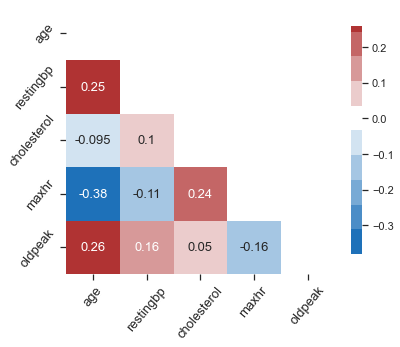

In [16]:
corr_matrix_plot(data_raw, con_feat_list)

#### Conclusions

Correlation is low.

#### Multicollinearity

In [17]:
data_multi = data_raw.copy()

In [18]:
# OneHot encoding for VIF
data_multi_oh = pd.get_dummies(data_multi.drop('hd', axis=1), drop_first=1)

# MinMax scaling for VIF
data_multi_oh_minmax = MinMaxScaler(feature_range = (0,1)).fit_transform(data_multi_oh)
data_multi_oh_minmax = pd.DataFrame(data_multi_oh_minmax, index=data_multi_oh.index, columns=data_multi_oh.columns)

In [19]:
vif(data_multi_oh_minmax.columns, data_multi_oh_minmax)

,VIF,Tolerance
st_slope_Up,5.523789,0.181035
st_slope_Flat,4.513918,0.221537
restingecg_Normal,1.741934,0.574075
restingecg_ST,1.704894,0.586547
exerciseangina_Y,1.583291,0.631596
maxhr,1.556617,0.642419
oldpeak,1.534675,0.651604
chestpaintype_ATA,1.505606,0.664184
age,1.395579,0.716548
chestpaintype_NAP,1.263967,0.791160


#### Conclusions

All features VIF < 6, Tolerance > 0.18, Multicollinearity is low.

## Data Cleaning and Transforming

**restingbp**: One higher outlier. <br>
**cholesterol**: A lot of zero values (about 20%). We'll use kNN method to fill zeroes. <br>
**oldpeak**: Several valuess less than zero, but that might be OK. <br>

#### Functions

In [20]:
def outliers (df, con_feat_list, scale=1.5):
    
    values = {}
    index = ['Count', 'Lower Outliers', 'Upper Outliers', 'Q25', 'Q75', 'IQR', 'Lower Fence', 'Upper Fence', 'Scale']
    global perc
    perc = {}
    
    for i in con_feat_list:
        q25, q75 = np.percentile(df[i], [25,75])
        iqr = q75 - q25
        lower = q25 - scale*iqr
        upper = q75 + scale*iqr
        perc['{0}'.format(i)] = [round(j, 2) for j in [q25, q75, iqr, lower, upper, scale]]
    
    for i in con_feat_list:
        
        q25, q75, iqr, lower, upper, scale = [perc[i][j] for j in range(0,6)]
        values['{0}'.format(i)] = [round(j, 2) for j in [df[i].count(), len(df[df[i] < lower]), len(df[df[i] > upper]), 
                                                      q25, q75, iqr, lower, upper, scale]]
        result = pd.DataFrame(values, index=index)
  
    return result

        
def outliers_cleaned (df, con_feat_list, scale=1.5):

    df_clean = df.copy()
    
    for i in con_feat_list:
        
        q25, q75, iqr, lower, upper, scale = [perc[i][j] for j in range(0,6)]
        df_clean = df_clean.drop(df_clean.index[(df_clean[i] < lower) | (df_clean[i] > upper)])  
        
    return df_clean


def knn_imput (df, variable, target_variable):

    df_input = df.copy()

    df_imput_encoded = pd.get_dummies(df_input.drop(target_variable, axis=1), drop_first=1)
    df_imput_encoded = pd.concat([df_imput_encoded, df_input[target_variable]], axis=1)

    # filling cholesterol zero values by NaN
    df_imput_encoded.loc[df_imput_encoded[variable]==0, variable] = np.nan

    global imputer
    imputer = KNNImputer(n_neighbors=5)
    imputer.fit(df_imput_encoded)

    # transform data_train_imput_encoded to get np.array with transformed values
    # get cholesterol values from this array by indicating it's index with get_loc method
    # replace cholesterol values in data_train by cholesterol transformed values
    df_input[variable] = imputer.transform(df_imput_encoded)[:, df_imput_encoded.columns.get_loc(variable)]
    
    return df_input


def knn_imput_test (df, variable, target_variable):

    df_input = df.copy()

    df_imput_encoded = pd.get_dummies(df_input.drop(target_variable, axis=1), drop_first=1)
    df_imput_encoded = pd.concat([df_imput_encoded, df_input[target_variable]], axis=1)

    # filling cholesterol zero values by NaN
    df_imput_encoded.loc[df_imput_encoded.cholesterol==0, variable] = np.nan

    # using imputer created with imput_train function
    df_input[variable] = imputer.transform(df_imput_encoded)[:, df_imput_encoded.columns.get_loc(variable)]
    
    return df_input


def data_cleaned_display (df_raw, df_cleaned, variable):

    display(pd.concat([df_raw[variable].describe().to_frame().T.rename(index={variable: 'raw'}),
               df_cleaned[variable].describe().to_frame().T.rename(index={variable: 'cleaned'})], axis=0))
    print('')

    f, ax = plt.subplots(1,2, figsize=(13,4))
    custom_xlim = (0, 700)
    custom_ylim = (0, 190)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)

    sns.histplot(data=df_raw, x=variable, kde=1, binwidth=15, ax=ax[0])
    sns.histplot(data=df_cleaned, x=variable, kde=1, binwidth=15, ax=ax[1])

    plt.show()
    

def con_feat_histplot(df, con_feat_list, columns=3, figsize=(14,9)):
    
    f, axes = plt.subplots(round(len(con_feat_list)/columns),columns, figsize=figsize)
    f.delaxes(axes[round(len(con_feat_list)/columns)-1][columns - 
                                                        (columns*round(len(con_feat_list)/columns)-len(con_feat_list))])
    
    j=0
    k=0

    for i in con_feat_list:
        sns.histplot(data=df,x=i, ax=axes[j , k], palette=palette_light);
        k+=1
        if k==columns:
            j+=1
            k=0

### Filling zeroes using KNN-Imputation 

#### Cholesterol

In [21]:
data_raw.loc[data_raw.cholesterol==0, 'cholesterol'].count()

172

,count,mean,std,min,25%,50%,75%,max
raw,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
cleaned,918.0,244.902832,54.680240,85.0,212.00,239.1,273.0,603.0


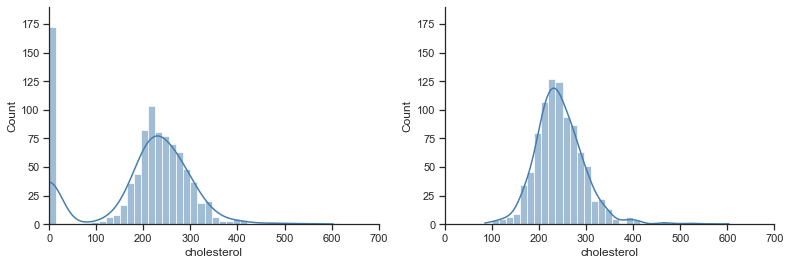

In [22]:
data = knn_imput(data_raw, 'cholesterol', 'hd')

data_cleaned_display(data_raw, data, 'cholesterol')

In [23]:
data.loc[data.cholesterol==0, 'cholesterol'].count()

0

In [24]:
data.shape

(918, 12)

### Removing Outliers

We also will use wide outlier window with 3 interquartile range to save data, because we don't know distribution type of each variable. 

In [25]:
outliers(data, con_feat_list, scale=3)

,age,restingbp,cholesterol,maxhr,oldpeak
Count,918.0,918.0,918.0,918.0,918.0
Lower Outliers,0.0,1.0,0.0,0.0,0.0
Upper Outliers,0.0,0.0,8.0,0.0,1.0
Q25,47.0,120.0,212.0,120.0,0.0
Q75,60.0,140.0,273.0,156.0,1.5
IQR,13.0,20.0,61.0,36.0,1.5
Lower Fence,8.0,60.0,29.0,12.0,-4.5
Upper Fence,99.0,200.0,456.0,264.0,6.0
Scale,3.0,3.0,3.0,3.0,3.0


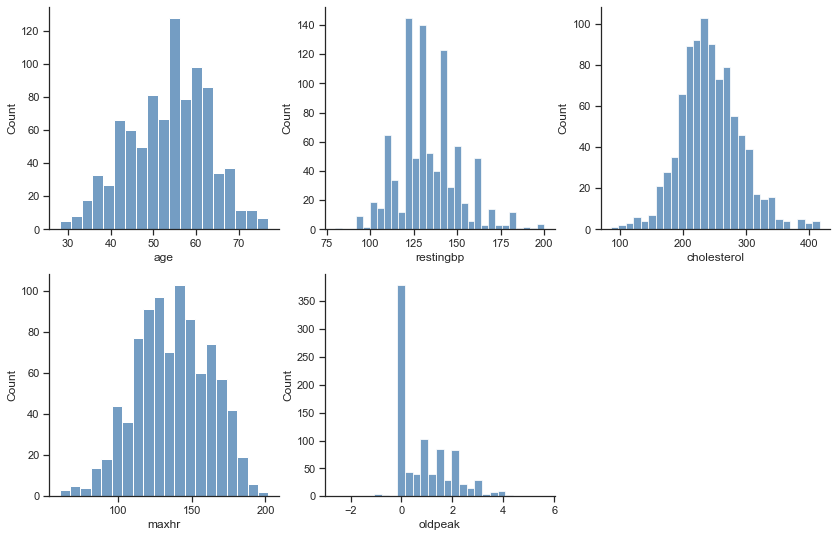

In [26]:
data = outliers_cleaned(data, con_feat_list, scale=3)

con_feat_histplot(data, con_feat_list)

In [27]:
data.shape

(908, 12)

## Data Splitting

In [28]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [29]:
print(data_train.shape, data_test.shape)

(726, 12) (182, 12)


In [30]:
X_train = data_train.drop(tar_list, axis=1)
y_train = data_train[tar_list].values.ravel()

In [31]:
X_test = data_test.drop(tar_list, axis=1)
y_test = data_test[tar_list].values.ravel()

## Data Encoding And Scaling

#### One Hot Encoding

In [32]:
X_train_oh = pd.get_dummies(X_train)
X_test_oh = pd.get_dummies(X_test)

In [33]:
X_train_oh.shape, X_test_oh.shape

((726, 20), (182, 20))

#### Target Encoding for categorial variables

In [34]:
data_train_te = data_train.copy()
data_test_te = data_train.copy()

In [35]:
te = ce.TargetEncoder()
te.fit(data_train, data_train[tar_list])

data_train_te = te.transform(data_train)
data_test_te = te.transform(data_test)

X_train_te = data_train_te.drop(tar_list, axis=1)
X_test_te = data_test_te.drop(tar_list, axis=1)

In [36]:
X_train_te.shape, X_test_te.shape

((726, 11), (182, 11))

#### MinMaxScaler for continuous variables

In [37]:
minmax_te = MinMaxScaler(feature_range = (0,1))
minmax_te.fit(X_train_te[con_feat_list])

X_train_te[con_feat_list] = minmax_te.transform(X_train_te[con_feat_list])
X_test_te[con_feat_list] = minmax_te.transform(X_test_te[con_feat_list])

In [38]:
X_train_te.shape, X_test_te.shape

((726, 11), (182, 11))

In [39]:
minmax_oh = MinMaxScaler(feature_range = (0,1))
minmax_oh.fit(X_train_oh[con_feat_list])

X_train_oh[con_feat_list] = minmax_oh.transform(X_train_oh[con_feat_list])
X_test_oh[con_feat_list] = minmax_oh.transform(X_test_oh[con_feat_list])

In [40]:
X_train_oh.shape, X_test_oh.shape

((726, 20), (182, 20))

In [41]:
X_train_te.head(3)

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope
87,0.510204,0.222930,0.126866,0.500000,0.394578,0,0.503529,0.577465,0.838926,0.605263,0.810959
10,0.183673,0.222930,0.351515,0.416667,0.379518,0,0.503529,0.577465,0.345794,0.342105,0.201923
626,0.510204,0.637961,0.782609,0.516667,0.424699,0,0.567901,0.359155,0.838926,0.342105,0.201923


In [42]:
X_test_te.head(3)

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope
875,0.612245,0.222930,0.351515,0.333333,0.768072,0,0.503529,0.788732,0.345794,0.342105,0.201923
445,0.551020,0.637961,0.351515,0.466667,0.430723,0,0.661871,0.450704,0.838926,0.552632,0.810959
348,0.836735,0.637961,0.782609,0.475000,0.412048,0,0.661871,0.309859,0.838926,0.552632,0.810959


In [43]:
X_train_oh.head(3)

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,sex_F,sex_M,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,exerciseangina_N,exerciseangina_Y,st_slope_Down,st_slope_Flat,st_slope_Up
87,0.510204,0.500000,0.394578,0,0.577465,0.605263,1,0,0,1,0,0,0,1,0,0,1,0,1,0
10,0.183673,0.416667,0.379518,0,0.577465,0.342105,1,0,0,0,1,0,0,1,0,1,0,0,0,1
626,0.510204,0.516667,0.424699,0,0.359155,0.342105,0,1,1,0,0,0,1,0,0,0,1,0,0,1


In [44]:
X_test_oh.head(3)

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,sex_F,sex_M,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA,restingecg_LVH,restingecg_Normal,restingecg_ST,exerciseangina_N,exerciseangina_Y,st_slope_Down,st_slope_Flat,st_slope_Up
875,0.612245,0.333333,0.768072,0,0.788732,0.342105,1,0,0,0,1,0,0,1,0,1,0,0,0,1
445,0.551020,0.466667,0.430723,0,0.450704,0.552632,0,1,0,0,1,0,0,0,1,0,1,0,1,0
348,0.836735,0.475000,0.412048,0,0.309859,0.552632,0,1,1,0,0,0,0,0,1,0,1,0,1,0


## Model Evaluation

#### Functions

In [45]:
def model_evaluation(clf, X, y):
    clf = clf # pass classifier to variable
    
    t_start = time.time() # record time
    clf = clf.fit(X, y) # classifier learning model
    t_end = time.time() # record time
    
    c_start = time.time() # record time
    accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    f1_score = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
    c_end = time.time() # record time
    
    # calculate mean of all 10 obs' accuracy and f1 as percent
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    t_time = np.round((t_end - t_start) / 60, 3) # time for training
    c_time = np.round((c_end - c_start) / 60, 3) # time for evaluating scores
    
    clf = None # remove traces of classifier
    
    print(f'The accuracy score of this classifier is: {acc_mean}%.')
    print(f'The f1 score of this classifier is: {f1_mean}%.')
    print(f'This classifier took {t_time} minutes to train and {c_time} minutes to evaluate CV and metric scores.')

#### Benchmark:  MultinomialNB Classifier

In [46]:
model_evaluation(MultinomialNB(), X_train_te, y_train)

The accuracy score of this classifier is: 79.33%.
The f1 score of this classifier is: 78.43%.
This classifier took 0.0 minutes to train and 0.002 minutes to evaluate CV and metric scores.


In [47]:
model_evaluation(MultinomialNB(), X_train_oh, y_train)

The accuracy score of this classifier is: 85.4%.
The f1 score of this classifier is: 85.18%.
This classifier took 0.0 minutes to train and 0.002 minutes to evaluate CV and metric scores.


#### Models to evaluate:

- K-Nearest Neighbor (KNN)
- Random Forest (RF)
- Support Vector Machine (SVC)
- Stochastic Gradient Descent Classifier (SGDC)
- Extra Trees Classifier (ETC)
- Logistic Regression (LR)

#### 1. K-Nearest Neighbors

In [48]:
model_evaluation(KNeighborsClassifier(), X_train_te, y_train)

The accuracy score of this classifier is: 83.18%.
The f1 score of this classifier is: 82.98%.
This classifier took 0.0 minutes to train and 0.005 minutes to evaluate CV and metric scores.


In [49]:
model_evaluation(KNeighborsClassifier(), X_train_oh, y_train)

The accuracy score of this classifier is: 82.51%.
The f1 score of this classifier is: 82.21%.
This classifier took 0.0 minutes to train and 0.005 minutes to evaluate CV and metric scores.


#### 2. Random Forest Classifier

In [50]:
model_evaluation(RandomForestClassifier(random_state=42), X_train_te, y_train)

The accuracy score of this classifier is: 84.42%.
The f1 score of this classifier is: 84.2%.
This classifier took 0.004 minutes to train and 0.15 minutes to evaluate CV and metric scores.


In [51]:
model_evaluation(RandomForestClassifier(random_state=42), X_train_oh, y_train)

The accuracy score of this classifier is: 85.12%.
The f1 score of this classifier is: 84.89%.
This classifier took 0.005 minutes to train and 0.095 minutes to evaluate CV and metric scores.


#### 3. SVM

In [52]:
model_evaluation(SVC(random_state=42), X_train_te, y_train)

The accuracy score of this classifier is: 85.8%.
The f1 score of this classifier is: 85.49%.
This classifier took 0.001 minutes to train and 0.008 minutes to evaluate CV and metric scores.


In [53]:
model_evaluation(SVC(random_state=42), X_train_oh, y_train)

The accuracy score of this classifier is: 84.57%.
The f1 score of this classifier is: 84.3%.
This classifier took 0.001 minutes to train and 0.011 minutes to evaluate CV and metric scores.


#### 4. Stochastic Gradient Descent Classifier 

In [54]:
model_evaluation(SGDClassifier(random_state=42), X_train_te, y_train)

The accuracy score of this classifier is: 84.02%.
The f1 score of this classifier is: 83.67%.
This classifier took 0.0 minutes to train and 0.008 minutes to evaluate CV and metric scores.


In [55]:
model_evaluation(SGDClassifier(random_state=42), X_train_oh, y_train)

The accuracy score of this classifier is: 81.81%.
The f1 score of this classifier is: 81.37%.
This classifier took 0.0 minutes to train and 0.005 minutes to evaluate CV and metric scores.


#### 5. Extra Trees Classifier

In [56]:
model_evaluation(ExtraTreesClassifier(random_state=42), X_train_te, y_train)

The accuracy score of this classifier is: 84.15%.
The f1 score of this classifier is: 83.92%.
This classifier took 0.004 minutes to train and 0.073 minutes to evaluate CV and metric scores.


In [57]:
model_evaluation(ExtraTreesClassifier(random_state=42), X_train_oh, y_train)

The accuracy score of this classifier is: 83.6%.
The f1 score of this classifier is: 83.38%.
This classifier took 0.004 minutes to train and 0.066 minutes to evaluate CV and metric scores.


#### 6. Logisitic Regression

In [58]:
model_evaluation(LogisticRegression(solver='saga', max_iter = 5000, random_state=42), X_train_te, y_train)

The accuracy score of this classifier is: 85.11%.
The f1 score of this classifier is: 84.87%.
This classifier took 0.0 minutes to train and 0.006 minutes to evaluate CV and metric scores.


In [59]:
model_evaluation(LogisticRegression(solver='saga', max_iter = 5000, random_state=42), X_train_oh, y_train)

The accuracy score of this classifier is: 84.7%.
The f1 score of this classifier is: 84.47%.
This classifier took 0.001 minutes to train and 0.01 minutes to evaluate CV and metric scores.


## Hyperparameters Tuning and Model Selection

#### Functions

In [60]:
def hyper( X_train, y_train, clf, scoring, search, hyper_params):
    
    if search=='random':
        cv = RandomizedSearchCV(estimator=clf,
                                param_distributions=hyper_params,
                                scoring=scoring,
                                cv=5,
                                random_state=42)

        t_start = time.time()

        cv.fit(X_train, y_train)

        best_estimator = cv.best_estimator_
        
        t_end = time.time()
        t_time = np.round((t_end - t_start) / 60, 3)
        
        print('Time for hyperparameters searching: {}'.format(t_time), '\n')
        print(cv.best_estimator_, '\n')

    if search=='grid':
    
        cv = GridSearchCV(estimator=clf, 
                                      param_grid=hyper_params,
                                      scoring=scoring,
                                      cv=5)

        t_start = time.time()
        
        cv.fit(X_train, y_train)

        best_estimator = cv.best_estimator_
        
        t_end = time.time()
        t_time = np.round((t_end - t_start) / 60, 3)

        print('Time for hyperparameters searching: {}'.format(t_time), '\n')
        print(cv.best_estimator_, '\n')
    
    clf = None
    cv = None
    

def cl_report(y_test, y_pred, name, encoding):
    
    cl_report_df = classification_report(y_test,
                                   y_pred,
                                   target_names=['0', '1'],
                                   output_dict=True)

    plt.subplots(figsize=(9,3))
    sns.heatmap(pd.DataFrame(cl_report_df).iloc[:-1, :].T, 
                cmap=palette_heatmap, 
                annot_kws={'size': 13}, 
                cbar_kws={'shrink': 1}, 
                annot=True,
                xticklabels=['Precision', 'Recall', 'F1-Score'],
                yticklabels=['HD: 0', 'HD: 1', 'Accuracy', 'Macro Avg', 'Weighted Avg'],
                vmin=0.85, vmax=0.95)

    plt.xticks(size=13)
    plt.yticks(size=13)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.title('Classification Report {} {}'.format(str.upper(name), str.upper(encoding)), fontsize = 18, y=1.05)

    # plt.savefig('classification_report.png')

    plt.show()

    
def roc(y_test, dec_func1, dec_func2, name1, name2):
    
    fpr_name1, tpr_name1, thresholds_name1 = roc_curve(y_test, dec_func1)
    roc_auc_name1 = auc(fpr_name1, tpr_name1)

    fpr_name2, tpr_name2, thresholds_name2 = roc_curve(y_test, dec_func2)
    roc_auc_name2 = auc(fpr_name2, tpr_name2)

    plt.figure(figsize=(8,6))
    plt.plot(fpr_name1, tpr_name1, label='ROC Curve {} (area = %0.2f)'.format(name1) % roc_auc_name1)
    plt.plot(fpr_name2, tpr_name2, label='ROC Curve {} (area = %0.2f)'.format(name2) % roc_auc_name2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.08])
    plt.xlabel('False Positive Rate', fontsize = 12)
    plt.ylabel('True Positive Rate (Recall)', fontsize = 12)
    plt.title('Receiver Operating Characteristic', fontsize = 16)
    plt.xticks(size=12)
    plt.yticks(size=12)

    close_default_name1 = np.argmin(np.abs(thresholds_name1 - 0.5)) 
    plt.plot(fpr_name1[close_default_name1], tpr_name1[close_default_name1], 
             '^', markersize=10, 
             label = '0.5 {} Predict Probability Threshold'.format(name1), 
             fillstyle='none', c='k', mew=3)

    close_zero_name2 = np.argmin(np.abs(thresholds_name2 - 0.5)) 
    plt.plot(fpr_name2[close_zero_name2], tpr_name2[close_zero_name2], 
             'o', markersize=10, 
             label ='0.5 {} Predict Probability Threshold'.format(name2), 
             fillstyle='none', c='k', mew=3)

    plt.legend(loc='lower right', fontsize = 13)

    # plt.savefig('roc_auc.png')

    plt.show()
    
    

def threshold_search_trees (y, y_pred_prob, lower, upper, step):
    
    array = np.arange(lower, upper, step)
    
    for i in array:
        y_pred_lower_threshold = np.where(y_pred_prob[:,1] >= i, 1,0)
        print('Threshold: {}'.format(i))
        print(classification_report(y, y_pred_lower_threshold))

### Random Forest Classifier

In [61]:
n_estimators = [10, 20 , 30, 40, 50, 100]
max_depth = [10, 20, 30, 40, 50, 100]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]
max_features = ['auto', 'sqrt', 'log2', None]

hyper_params_rf = {'n_estimators': n_estimators,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'max_features': max_features}

#### Random Forest Classifier with Target Encoded Data

In [62]:
hyper(X_train_te, y_train,
                  clf=RandomForestClassifier(random_state=42),
                  scoring='f1', search='random',
                  hyper_params=hyper_params_rf)

Time for hyperparameters searching: 0.11 

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=6,
                       min_samples_split=4, n_estimators=40, random_state=42) 



In [63]:
clf_rf_te = RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=6,
                       min_samples_split=4, n_estimators=40, random_state=42)

clf_rf_te.fit(X_train_te, y_train)
y_pred_rf_te = clf_rf_te.predict(X_test_te)

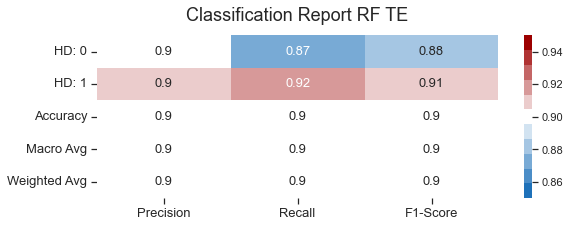

In [64]:
cl_report(y_test, y_pred_rf_te, name='rf', encoding='te')

#### Random Forest Classifier with One-Hot Encoded Data

In [65]:
hyper(X_train_oh, y_train,
                  clf=RandomForestClassifier(random_state=42),
                  scoring='f1', search='random',
                  hyper_params=hyper_params_rf)

Time for hyperparameters searching: 0.085 

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=6,
                       min_samples_split=4, n_estimators=40, random_state=42) 



In [66]:
clf_rf_oh = RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=6,
                       min_samples_split=4, n_estimators=40, random_state=42)

clf_rf_oh.fit(X_train_oh, y_train)
y_pred_rf_oh = clf_rf_oh.predict(X_test_oh)

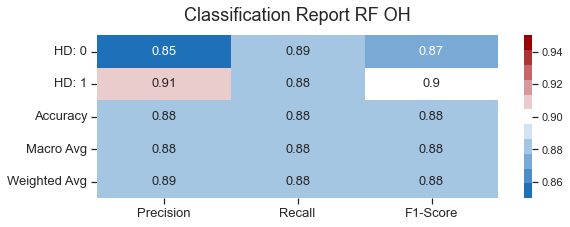

In [67]:
cl_report(y_test, y_pred_rf_oh, name='rf', encoding='oh')

### Extra Trees Classifier

In [68]:
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]
max_features = ['auto','sqrt','log2', None]

hyper_params_et = {'n_estimators': n_estimators,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'max_features': max_features}

#### Extra Trees Classifier with Target Encoded Data

In [69]:
hyper(X_train_te, y_train,
                  clf=ExtraTreesClassifier(random_state=42),
                  scoring='f1', search='random',
                  hyper_params=hyper_params_et)

Time for hyperparameters searching: 0.072 

ExtraTreesClassifier(max_depth=60, max_features='log2', min_samples_leaf=4,
                     min_samples_split=6, n_estimators=90, random_state=42) 



In [70]:
clf_et_te = ExtraTreesClassifier(max_depth=90, max_features='sqrt', min_samples_leaf=4,
                     min_samples_split=6, n_estimators=30, random_state=42)

clf_et_te.fit(X_train_te, y_train)
y_pred_et_te = clf_et_te.predict(X_test_te)

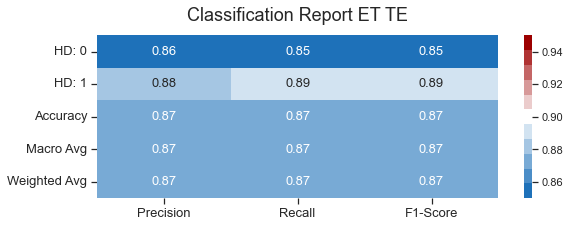

In [71]:
cl_report(y_test, y_pred_et_te, name='et', encoding='te')

#### Extra Trees Classifier with One-Hot Encoded Data

In [72]:
hyper(X_train_oh, y_train,
                  clf=ExtraTreesClassifier(random_state=42),
                  scoring='f1', search='random',
                  hyper_params=hyper_params_et)

Time for hyperparameters searching: 0.067 

ExtraTreesClassifier(max_depth=60, max_features='sqrt', min_samples_leaf=6,
                     min_samples_split=10, n_estimators=10, random_state=42) 



In [73]:
clf_et_oh = ExtraTreesClassifier(max_depth=60, max_features='sqrt', min_samples_leaf=6,
                     min_samples_split=10, n_estimators=10, random_state=42)

clf_et_oh.fit(X_train_oh, y_train)
y_pred_et_oh = clf_et_oh.predict(X_test_oh)

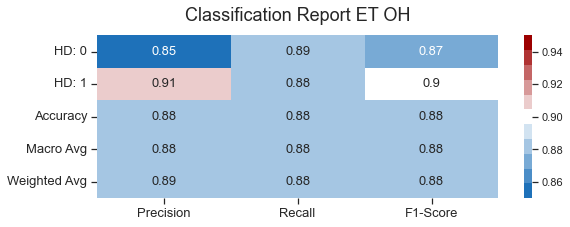

In [74]:
cl_report(y_test, y_pred_et_oh, name='et', encoding='oh')

### SVM

In [75]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10, 100]

hyper_params_svm = {'C': C,
              'gamma': gamma}

#### Support Vector Classifier with Target Encoded Data

In [76]:
hyper(X_train_te, y_train,
                  clf=SVC(random_state=42),
                  scoring='f1', search='random',
                  hyper_params=hyper_params_svm)

Time for hyperparameters searching: 0.027 

SVC(C=1, gamma=1, random_state=42) 



In [77]:
clf_svm_te = SVC(C=1, gamma=1, random_state=42)

clf_svm_te.fit(X_train_te, y_train)
y_pred_svm_te = clf_svm_te.predict(X_test_te)

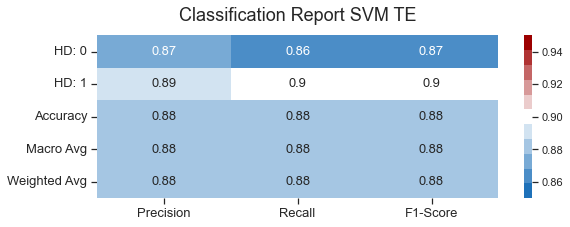

In [78]:
cl_report(y_test, y_pred_svm_te, name='svm', encoding='te')

#### Support Vector Classifier with One-Hot Encoded Data

In [79]:
hyper(X_train_oh, y_train,
                  clf=SVC(random_state=42),
                  scoring='f1', search='random',
                  hyper_params=hyper_params_svm)

Time for hyperparameters searching: 0.03 

SVC(C=100, gamma=0.001, random_state=42) 



In [80]:
clf_svm_oh = SVC(C=100, gamma=0.001, random_state=42)

clf_svm_oh.fit(X_train_oh, y_train)
y_pred_svm_oh = clf_svm_oh.predict(X_test_oh)

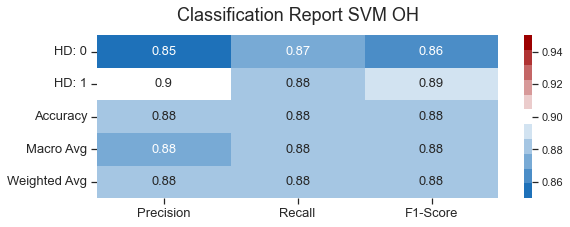

In [81]:
cl_report(y_test, y_pred_svm_oh, name='svm', encoding='oh')

## ROC Curve (Random Forest and Extra Trees Сomparison)

In [82]:
y_pred_prob_rf_te = clf_rf_te.predict_proba(X_test_te)
y_pred_prob_et_oh = clf_et_oh.predict_proba(X_test_oh)

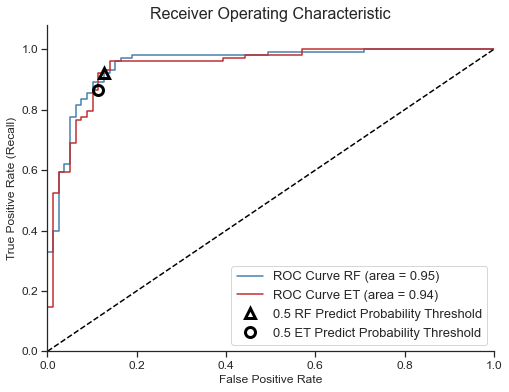

In [83]:
roc(y_test, y_pred_prob_rf_te[:, 1], y_pred_prob_et_oh[:, 1], 'RF', 'ET')

## Feature Importances (Random Forest and Extra Trees Сomparison)

#### Random Forest Classifier with Target Encoded Data

In [84]:
feature_importances_rf_te = pd.DataFrame(clf_rf_te.feature_importances_, index=X_train_te.columns,
                                      columns=['RF TE']).sort_values('RF TE', ascending=0)

In [85]:
feature_importances_rf_te

,RF TE
st_slope,0.269259
chestpaintype,0.161352
exerciseangina,0.134698
oldpeak,0.123477
maxhr,0.085927
age,0.060044
sex,0.048512
restingbp,0.037717
cholesterol,0.037602
fastingbs,0.028314


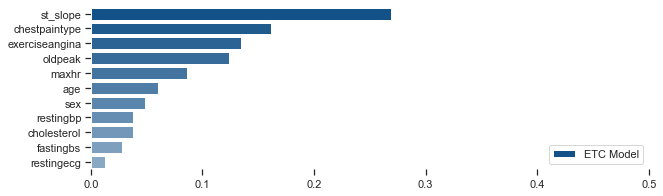

In [86]:
f, ax = plt.subplots(figsize=(10, 3))

sns.barplot(x='RF TE', 
            y='index', 
            label='ETC Model', 
            palette=palette_gradient_wide,
            data=feature_importances_rf_te.sort_values('RF TE', ascending=False).reset_index())

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlim=(0, 0.5), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=True)

#### Extra Trees Classifier with One-Hot Encoded Data

In [87]:
feature_importances_et_oh = pd.DataFrame(clf_et_oh.feature_importances_, index=X_train_oh.columns,
                                      columns=['ET OH']).sort_values('ET OH', ascending=0)

In [88]:
feature_importances_et_oh

,ET OH
chestpaintype_ASY,0.245741
st_slope_Up,0.197311
exerciseangina_N,0.171449
st_slope_Flat,0.118069
sex_F,0.058430
sex_M,0.032732
oldpeak,0.030386
fastingbs,0.028867
age,0.022095
chestpaintype_NAP,0.017231


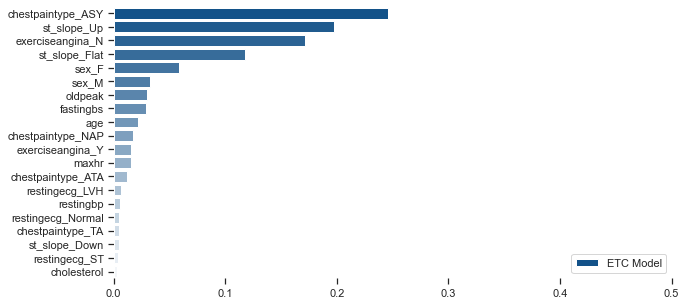

In [89]:
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='ET OH', 
            y='index', 
            label='ETC Model', 
            palette=palette_gradient_wide,
            data=feature_importances_et_oh.sort_values('ET OH', ascending=False).reset_index())

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlim=(0, 0.5), ylabel="",
       xlabel="")
sns.despine(left=True, bottom=True)

## Precision/Recall Trade-off

#### Random Forest Classifier with Target Encoded Data

In [90]:
y_pred_train_rf_te = clf_rf_te.predict_proba(X_train_te)

In [91]:
threshold_search_trees(y_train, y_pred_train_rf_te, lower=0.3, upper=0.5, step=0.05)

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.97      0.70      0.82       328
           1       0.80      0.98      0.88       398

    accuracy                           0.86       726
   macro avg       0.89      0.84      0.85       726
weighted avg       0.88      0.86      0.85       726

Threshold: 0.35
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       328
           1       0.82      0.98      0.89       398

    accuracy                           0.87       726
   macro avg       0.89      0.86      0.87       726
weighted avg       0.89      0.87      0.87       726

Threshold: 0.39999999999999997
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       328
           1       0.85      0.96      0.91       398

    accuracy                           0.89       726
   macro avg       0.90      0.88      0.89       726
weighted avg

In [92]:
threshold_rf_te = 0.35

In [93]:
y_pred_rf_te_thresh = (y_pred_prob_rf_te[:,1] >= threshold_rf_te).astype('int')

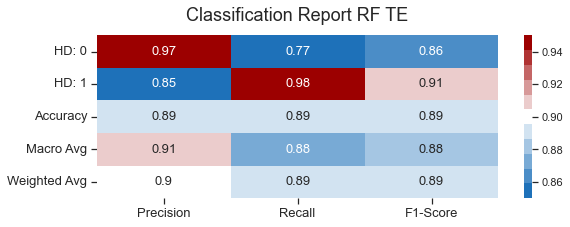

In [95]:
cl_report(y_test, y_pred_rf_te_thresh, name='rf', encoding='te')

#### Extra Trees Classifier with One-Hot Encoded Data

In [96]:
y_pred_train_et_oh = clf_et_oh.predict_proba(X_train_oh)

In [97]:
threshold_search_trees(y_train, y_pred_train_et_oh, lower=0.3, upper=0.5, step=0.05)

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       328
           1       0.81      0.98      0.88       398

    accuracy                           0.86       726
   macro avg       0.89      0.85      0.85       726
weighted avg       0.88      0.86      0.86       726

Threshold: 0.35
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       328
           1       0.83      0.97      0.89       398

    accuracy                           0.87       726
   macro avg       0.89      0.86      0.87       726
weighted avg       0.88      0.87      0.87       726

Threshold: 0.39999999999999997
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       328
           1       0.83      0.94      0.89       398

    accuracy                           0.87       726
   macro avg       0.88      0.86      0.86       726
weighted avg

In [98]:
threshold_et_oh = 0.35

In [99]:
y_pred_et_oh_thresh = (y_pred_prob_et_oh[:,1] >= threshold_et_oh).astype('int')

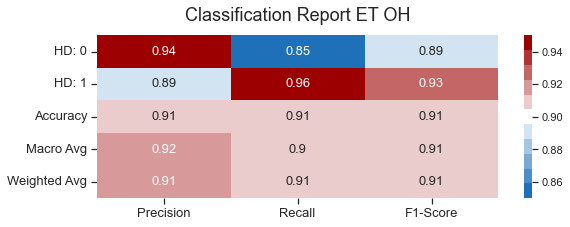

In [100]:
cl_report(y_test, y_pred_et_oh_thresh, name='et', encoding='oh')

## Final Datasets

#### Random Forest Classifier with Target Encoded Data

In [101]:
data_predicted_rf_te = X_test.copy()

In [102]:
data_predicted_rf_te['hd'] = y_test
data_predicted_rf_te['hd_rf_te'] = y_pred_rf_te_thresh

In [103]:
data_predicted_rf_te

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd,hd_rf_te
875,58,F,NAP,120,340.0,0,Normal,172,N,0.0,Up,0,0
445,55,M,NAP,136,228.0,0,ST,124,Y,1.6,Flat,1,1
348,69,M,ASY,137,221.8,0,ST,104,Y,1.6,Flat,1,1
745,63,F,ASY,108,269.0,0,Normal,169,Y,1.8,Flat,1,1
794,50,M,NAP,129,196.0,0,Normal,163,N,0.0,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,67,M,ASY,140,219.0,0,ST,122,Y,2.0,Flat,1,1
878,49,M,ATA,130,266.0,0,Normal,171,N,0.6,Up,0,0
452,60,M,ASY,140,281.0,0,ST,118,Y,1.5,Flat,1,1
795,42,M,NAP,120,240.0,1,Normal,194,N,0.8,Down,0,1


In [104]:
data_predicted_rf_te['error'] = data_predicted_rf_te['hd'] != data_predicted_rf_te['hd_rf_te']

In [105]:
data_predicted_rf_te.loc[data_predicted_rf_te.error==True, 'error'].count()

20

In [106]:
data_predicted_rf_te.loc[(data_predicted_rf_te.error==True) & (data_predicted_rf_te.hd==1)]

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd,hd_rf_te,error
759,54,M,ATA,192,283.0,0,LVH,195,N,0.0,Up,1,0,True
682,58,F,ATA,136,319.0,1,LVH,152,N,0.0,Up,1,0,True


In [107]:
data_predicted_rf_te.loc[(data_predicted_rf_te.error==True) & (data_predicted_rf_te.hd==1)]['hd'].count()

2

#### Extra Trees Classifier with One-Hot Encoded Data

In [108]:
data_predicted_et_oh = X_test.copy()

In [109]:
data_predicted_et_oh['hd'] = y_test
data_predicted_et_oh['hd_et_oh'] = y_pred_et_oh_thresh

In [110]:
data_predicted_et_oh

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd,hd_et_oh
875,58,F,NAP,120,340.0,0,Normal,172,N,0.0,Up,0,0
445,55,M,NAP,136,228.0,0,ST,124,Y,1.6,Flat,1,1
348,69,M,ASY,137,221.8,0,ST,104,Y,1.6,Flat,1,1
745,63,F,ASY,108,269.0,0,Normal,169,Y,1.8,Flat,1,1
794,50,M,NAP,129,196.0,0,Normal,163,N,0.0,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,67,M,ASY,140,219.0,0,ST,122,Y,2.0,Flat,1,1
878,49,M,ATA,130,266.0,0,Normal,171,N,0.6,Up,0,0
452,60,M,ASY,140,281.0,0,ST,118,Y,1.5,Flat,1,1
795,42,M,NAP,120,240.0,1,Normal,194,N,0.8,Down,0,1


In [111]:
data_predicted_et_oh['error'] = data_predicted_et_oh['hd'] != data_predicted_et_oh['hd_et_oh']

In [112]:
data_predicted_et_oh.loc[data_predicted_et_oh.error==True, 'error'].count()

16

In [113]:
data_predicted_et_oh.loc[(data_predicted_et_oh.error==True) & (data_predicted_et_oh.hd==1)]

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd,hd_et_oh,error
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,0,True
759,54,M,ATA,192,283.0,0,LVH,195,N,0.0,Up,1,0,True
682,58,F,ATA,136,319.0,1,LVH,152,N,0.0,Up,1,0,True
315,74,M,ATA,145,230.0,1,ST,123,N,1.3,Up,1,0,True


In [114]:
data_predicted_et_oh.loc[(data_predicted_et_oh.error==True) & (data_predicted_et_oh.hd==1)]['hd'].count()

4